In [ ]:
pip install pandas matplotlib seaborn

Sample rows:


,text,hartmann_label,hartmann_score,goemotions_label,goemotions_ekman_label,goemotions_score,bsavani_label,bsavani_score,joeddav_label,joeddav_ekman_label,joeddav_score
862,"I will pass through all thy flock to day, remo...",disgust,0.795149,neutral,neutral,0.941309,joy,0.798691,approval,joy,0.110483
76,Unto Adam also and to his wife did the LORD Go...,disgust,0.891610,neutral,neutral,0.939636,joy,0.663462,caring,joy,0.086516
316,"And Pharaoh called Abram, and said, What is th...",fear,0.312979,neutral,neutral,0.789047,anger,0.965612,confusion,surprise,0.197093
679,"And Isaac intreated the LORD for his wife, bec...",disgust,0.482975,neutral,neutral,0.947607,anger,0.827476,disapproval,disgust,0.097018
420,"And Abraham took Ishmael his son, and all that...",disgust,0.491697,neutral,neutral,0.953477,anger,0.967240,realization,surprise,0.091214


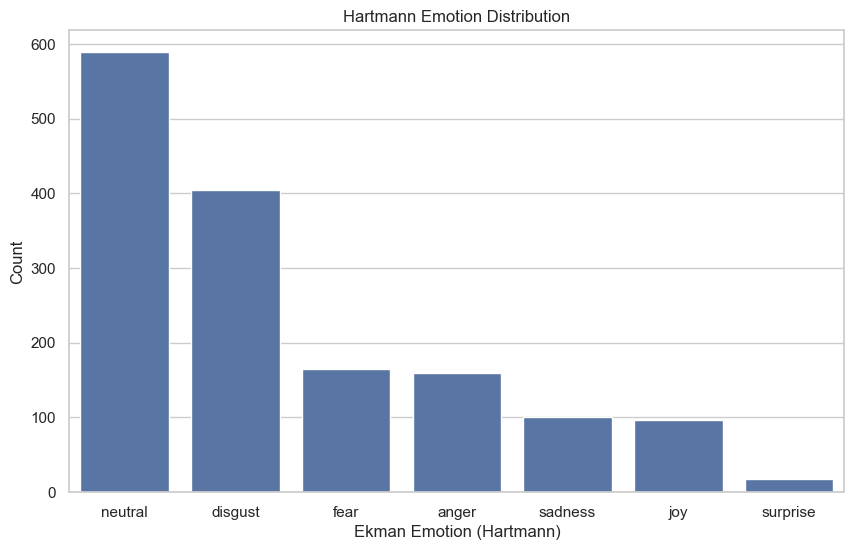

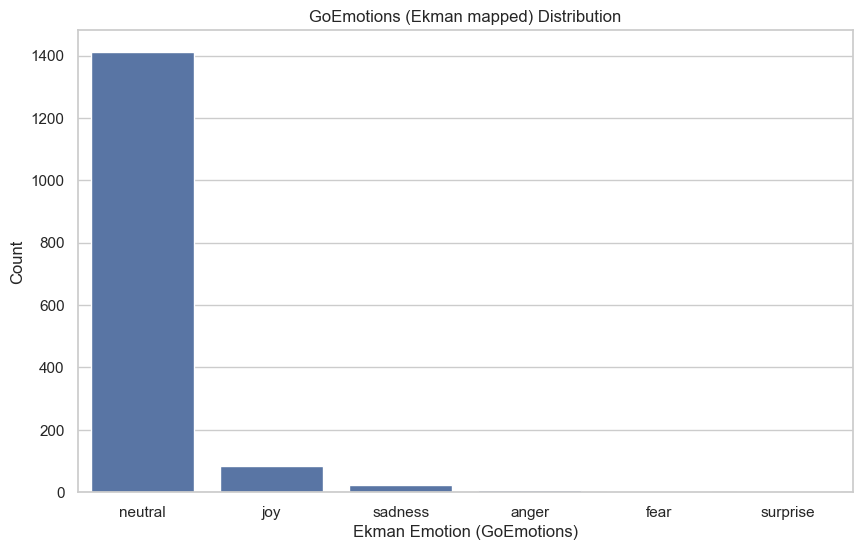

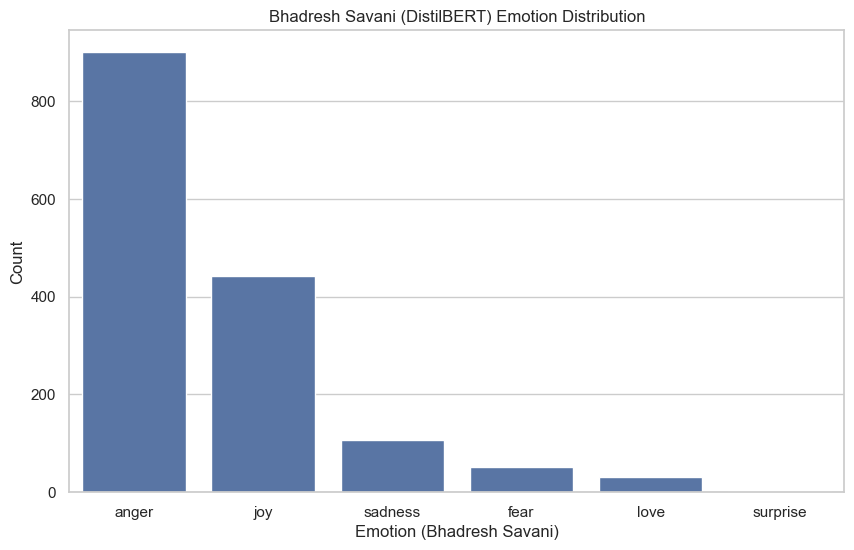

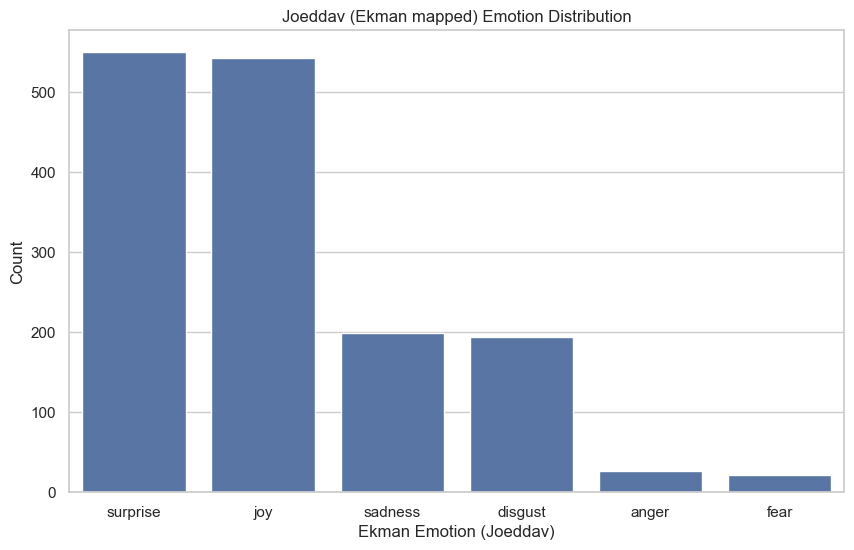

<Figure size 1400x700 with 0 Axes>

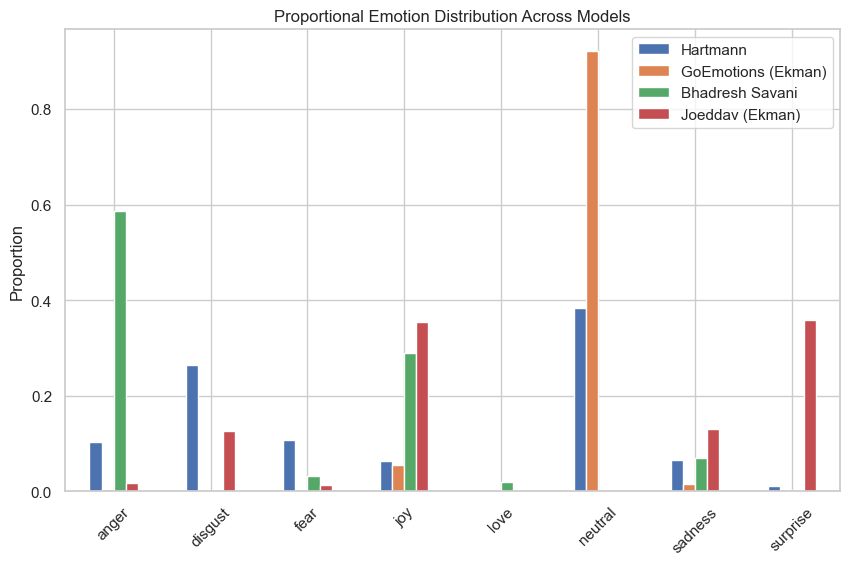

Agreement (Hartmann vs GoEmotions-Ekman): 39.07%
Agreement (Hartmann vs Bhadresh Savani): 15.92%
Agreement (Hartmann vs Joeddav): 14.35%
Agreement (GoEmotions-Ekman vs Bhadresh Savani): 6.00%
Agreement (GoEmotions-Ekman vs Joeddav): 5.94%
Agreement (Bhadresh Savani vs Joeddav): 21.14%


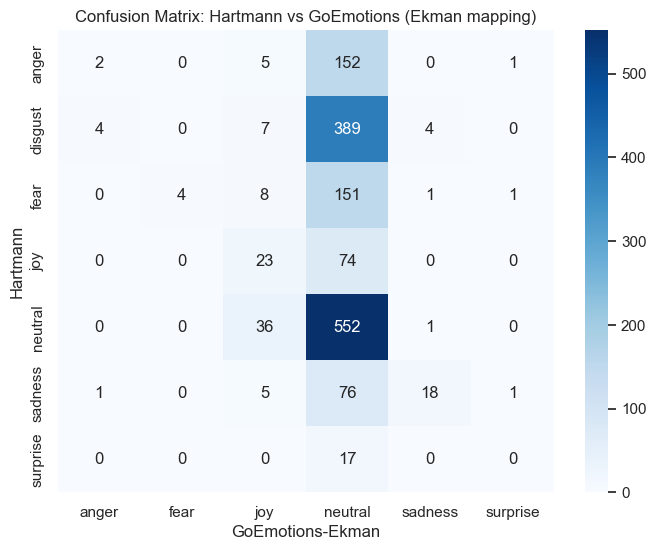

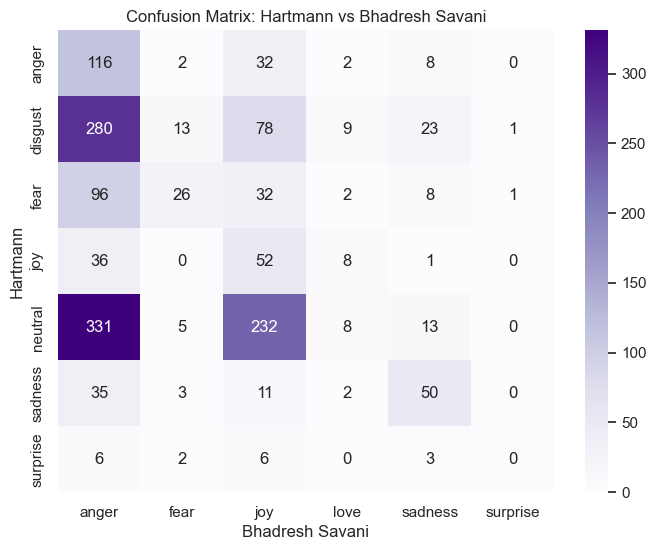

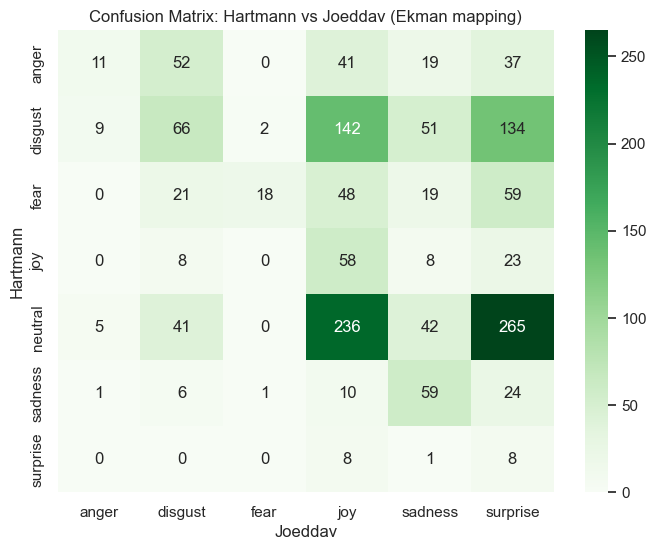

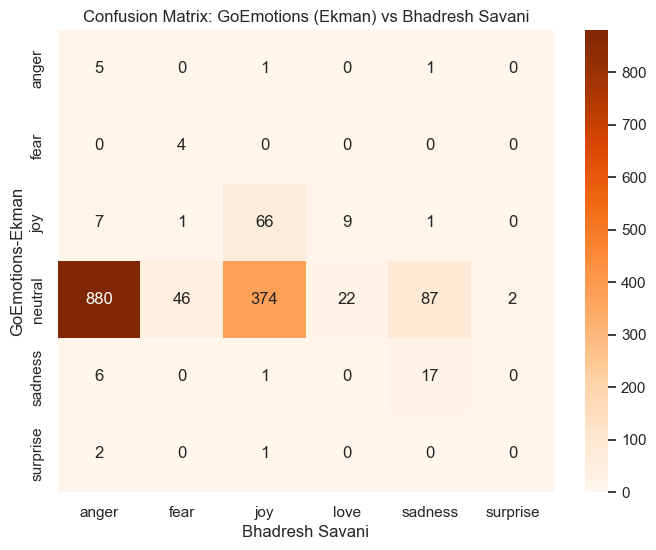

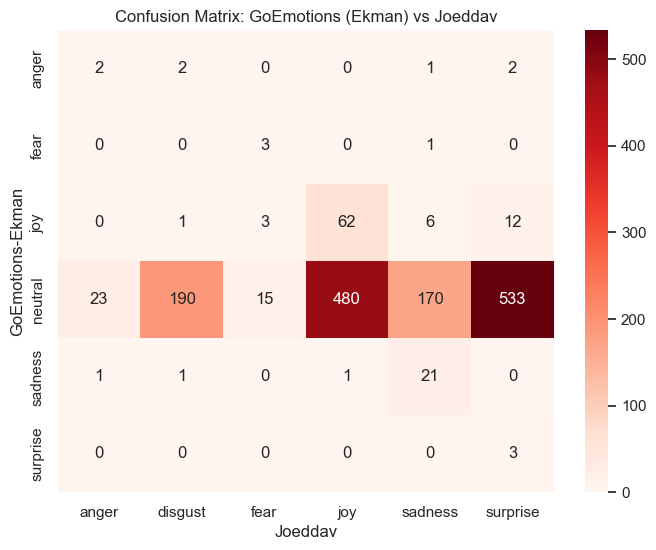

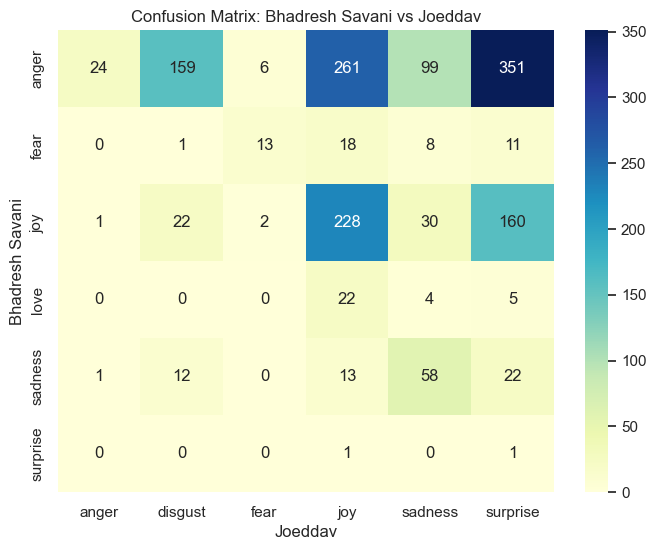


Examples where all four models agree:


,text,hartmann_label
1498,"Even by the God of thy father, who shall help ...",joy
843,"And Leah said, Happy am I, for the daughters w...",joy
1304,And God Almighty give you mercy before the man...,sadness
935,Then Jacob was greatly afraid and distressed: ...,fear
519,"And Sarah said, God hath made me to laugh, so ...",joy



Examples where all four models disagree:


,text,hartmann_label,goemotions_ekman_label,bsavani_label,joeddav_ekman_label
191,"Also he sent forth a dove from him, to see if ...",fear,neutral,joy,surprise
269,"And they said one to another, Go to, let us ma...",disgust,neutral,anger,surprise
85,"And the LORD said unto Cain, Why art thou wrot...",disgust,neutral,anger,surprise
1506,And when Jacob had made an end of commanding h...,disgust,neutral,anger,sadness
922,"And Mizpah; for he said, The LORD watch betwee...",fear,neutral,sadness,joy


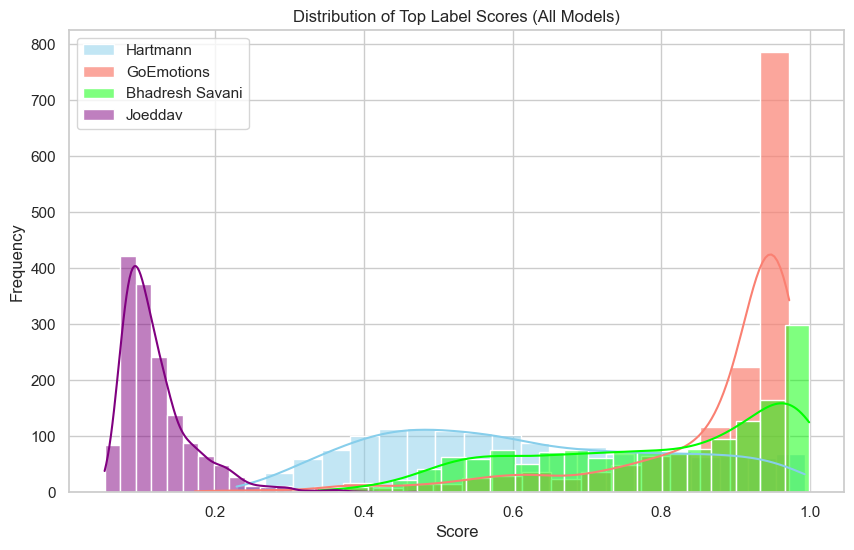


Biggest disagreements (high confidence, different emotions):


,text,hartmann_label,hartmann_score,goemotions_ekman_label,goemotions_score,bsavani_label,bsavani_score,joeddav_ekman_label,joeddav_score


Comparison complete. Explore further as needed!


In [10]:
# viz_models.ipynb

# 1. Imports & Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 6)
sns.set(style="whitegrid")

# 2. Load Data
df = pd.read_csv("../data/processed/bible_kjv/1_genesis_emotion_comparison.csv")  # Cambia el nombre si es necesario
print("Sample rows:")
display(df.sample(n=min(5, len(df)), random_state=42))

# 3. Emotion Distribution for All Models

# Hartmann distribution
plt.figure()
sns.countplot(x="hartmann_label", data=df, order=df['hartmann_label'].value_counts().index)
plt.title("Hartmann Emotion Distribution")
plt.xlabel("Ekman Emotion (Hartmann)")
plt.ylabel("Count")
plt.show()

# GoEmotions-Ekman distribution
plt.figure()
sns.countplot(x="goemotions_ekman_label", data=df, order=df['goemotions_ekman_label'].value_counts().index)
plt.title("GoEmotions (Ekman mapped) Distribution")
plt.xlabel("Ekman Emotion (GoEmotions)")
plt.ylabel("Count")
plt.show()

# Bhadresh Savani distribution
plt.figure()
sns.countplot(x="bsavani_label", data=df, order=df['bsavani_label'].value_counts().index)
plt.title("Bhadresh Savani (DistilBERT) Emotion Distribution")
plt.xlabel("Emotion (Bhadresh Savani)")
plt.ylabel("Count")
plt.show()

# Joeddav distribution (Ekman mapping)
plt.figure()
sns.countplot(x="joeddav_ekman_label", data=df, order=df['joeddav_ekman_label'].value_counts().index)
plt.title("Joeddav (Ekman mapped) Emotion Distribution")
plt.xlabel("Ekman Emotion (Joeddav)")
plt.ylabel("Count")
plt.show()

# 4. Compare All Four (Stacked bar)
plt.figure(figsize=(14,7))
dist_hart = df['hartmann_label'].value_counts(normalize=True)
dist_goekman = df['goemotions_ekman_label'].value_counts(normalize=True)
dist_bsavani = df['bsavani_label'].value_counts(normalize=True)
dist_joeddav = df['joeddav_ekman_label'].value_counts(normalize=True)

df_dist = pd.DataFrame({
    "Hartmann": dist_hart,
    "GoEmotions (Ekman)": dist_goekman,
    "Bhadresh Savani": dist_bsavani,
    "Joeddav (Ekman)": dist_joeddav
}).fillna(0)

df_dist.plot(kind="bar")
plt.title("Proportional Emotion Distribution Across Models")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.show()

# 5. Agreements and Confusion Matrices

# Agreement percentage between models
agree_hart_go = (df['hartmann_label'] == df['goemotions_ekman_label']).mean()
agree_hart_bsa = (df['hartmann_label'] == df['bsavani_label']).mean()
agree_hart_joeddav = (df['hartmann_label'] == df['joeddav_ekman_label']).mean()
agree_go_bsa = (df['goemotions_ekman_label'] == df['bsavani_label']).mean()
agree_go_joeddav = (df['goemotions_ekman_label'] == df['joeddav_ekman_label']).mean()
agree_bsa_joeddav = (df['bsavani_label'] == df['joeddav_ekman_label']).mean()

print(f"Agreement (Hartmann vs GoEmotions-Ekman): {agree_hart_go:.2%}")
print(f"Agreement (Hartmann vs Bhadresh Savani): {agree_hart_bsa:.2%}")
print(f"Agreement (Hartmann vs Joeddav): {agree_hart_joeddav:.2%}")
print(f"Agreement (GoEmotions-Ekman vs Bhadresh Savani): {agree_go_bsa:.2%}")
print(f"Agreement (GoEmotions-Ekman vs Joeddav): {agree_go_joeddav:.2%}")
print(f"Agreement (Bhadresh Savani vs Joeddav): {agree_bsa_joeddav:.2%}")

# Confusion matrix: Hartmann vs GoEmotions (Ekman)
plt.figure(figsize=(8,6))
conf_mat1 = pd.crosstab(df['hartmann_label'], df['goemotions_ekman_label'], rownames=['Hartmann'], colnames=['GoEmotions-Ekman'])
sns.heatmap(conf_mat1, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Hartmann vs GoEmotions (Ekman mapping)")
plt.show()

# Confusion matrix: Hartmann vs Bhadresh Savani
plt.figure(figsize=(8,6))
conf_mat2 = pd.crosstab(df['hartmann_label'], df['bsavani_label'], rownames=['Hartmann'], colnames=['Bhadresh Savani'])
sns.heatmap(conf_mat2, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix: Hartmann vs Bhadresh Savani")
plt.show()

# Confusion matrix: Hartmann vs Joeddav
plt.figure(figsize=(8,6))
conf_mat3 = pd.crosstab(df['hartmann_label'], df['joeddav_ekman_label'], rownames=['Hartmann'], colnames=['Joeddav'])
sns.heatmap(conf_mat3, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix: Hartmann vs Joeddav (Ekman mapping)")
plt.show()

# Confusion matrix: GoEmotions (Ekman) vs Bhadresh Savani
plt.figure(figsize=(8,6))
conf_mat4 = pd.crosstab(df['goemotions_ekman_label'], df['bsavani_label'], rownames=['GoEmotions-Ekman'], colnames=['Bhadresh Savani'])
sns.heatmap(conf_mat4, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix: GoEmotions (Ekman) vs Bhadresh Savani")
plt.show()

# Confusion matrix: GoEmotions (Ekman) vs Joeddav
plt.figure(figsize=(8,6))
conf_mat5 = pd.crosstab(df['goemotions_ekman_label'], df['joeddav_ekman_label'], rownames=['GoEmotions-Ekman'], colnames=['Joeddav'])
sns.heatmap(conf_mat5, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix: GoEmotions (Ekman) vs Joeddav")
plt.show()

# Confusion matrix: Bhadresh Savani vs Joeddav
plt.figure(figsize=(8,6))
conf_mat6 = pd.crosstab(df['bsavani_label'], df['joeddav_ekman_label'], rownames=['Bhadresh Savani'], colnames=['Joeddav'])
sns.heatmap(conf_mat6, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix: Bhadresh Savani vs Joeddav")
plt.show()

# 6. Show Examples (with robust sampling)
def safe_sample(df_, n=5):
    return df_.sample(n=min(n, len(df_)), random_state=42)

print("\nExamples where all four models agree:")
agree_all = df[
    (df['hartmann_label'] == df['goemotions_ekman_label']) &
    (df['hartmann_label'] == df['bsavani_label']) &
    (df['hartmann_label'] == df['joeddav_ekman_label'])
][['text', 'hartmann_label']]
display(safe_sample(agree_all, 5))

print("\nExamples where all four models disagree:")
disagree_all = df[
    (df['hartmann_label'] != df['goemotions_ekman_label']) &
    (df['hartmann_label'] != df['bsavani_label']) &
    (df['hartmann_label'] != df['joeddav_ekman_label']) &
    (df['goemotions_ekman_label'] != df['bsavani_label']) &
    (df['goemotions_ekman_label'] != df['joeddav_ekman_label']) &
    (df['bsavani_label'] != df['joeddav_ekman_label'])
][['text', 'hartmann_label', 'goemotions_ekman_label', 'bsavani_label', 'joeddav_ekman_label']]
display(safe_sample(disagree_all, 5))

# 7. Score Distribution (Optional)
plt.figure()
sns.histplot(df['hartmann_score'], bins=20, kde=True, color='skyblue', label='Hartmann')
sns.histplot(df['goemotions_score'], bins=20, kde=True, color='salmon', label='GoEmotions', alpha=0.7)
sns.histplot(df['bsavani_score'], bins=20, kde=True, color='lime', label='Bhadresh Savani', alpha=0.5)
sns.histplot(df['joeddav_score'], bins=20, kde=True, color='purple', label='Joeddav', alpha=0.5)
plt.title("Distribution of Top Label Scores (All Models)")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 8. Top Disagreements (high confidence, robust)
print("\nBiggest disagreements (high confidence, different emotions):")
big_disagreement = df[
    (df['hartmann_label'] != df['goemotions_ekman_label']) &
    (df['hartmann_label'] != df['bsavani_label']) &
    (df['hartmann_label'] != df['joeddav_ekman_label']) &
    (df['goemotions_ekman_label'] != df['bsavani_label']) &
    (df['goemotions_ekman_label'] != df['joeddav_ekman_label']) &
    (df['bsavani_label'] != df['joeddav_ekman_label']) &
    (df['hartmann_score'] > 0.8) & (df['goemotions_score'] > 0.8) & (df['bsavani_score'] > 0.8) & (df['joeddav_score'] > 0.8)
][['text', 'hartmann_label', 'hartmann_score', 'goemotions_ekman_label', 'goemotions_score', 'bsavani_label', 'bsavani_score', 'joeddav_ekman_label', 'joeddav_score']]
display(safe_sample(big_disagreement, 5))

# 9. Conclusion
print("Comparison complete. Explore further as needed!")
